<a href="https://colab.research.google.com/github/diegopovalz/proyecto-modelos1/blob/main/02%20-%20Preprocesado%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalamos Kaggle

In [ ]:
!pip install -q kaggle

## Obtener el kaggle.json

A partir de aquí tenemos dos opciones

### Opción 1

Descargamos nuestro token de Kaggle desde https://www.kaggle.com/settings/account, en el botón `Create New Token`

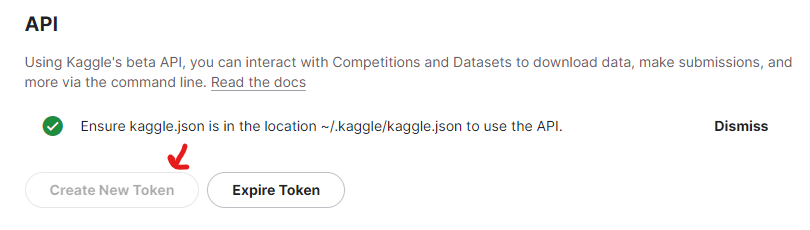

Y lo cargamos

In [ ]:
from google.colab import files
files.upload()

### Opción 2

Descargamos el `kaggle.json` de uno de los integrantes del equipo (Diego Poveda) y lo usamos

In [ ]:
!gdown 1WGDJbebCShFyozKKRJW3p78wJhwrZA12

### Configuración del archivo para API de Kaggle

Configuramos el archivo de API de Kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Descargamos el ZIP con los datasets del Kaggle

In [ ]:
!kaggle competitions download -c playground-series-s3e4

Y los extraemos para poder usar `train.csv`

In [ ]:
!unzip playground-series-s3e4.zip

Importamos las librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Consegumos el dataset

In [ ]:
df = pd.read_csv('train.csv')

# Simulación de datos

Empezamos simulando un rango de monto pagado (bajo, medio, alto)

In [ ]:
bins = [0, 50, 200, float('inf')]
labels = ['Bajo', 'Medio', 'Alto']
df['AmountRange'] = pd.cut(df['Amount'], bins=bins, labels=labels)
df

También simulamos el medio donde se hizo la transacción

In [ ]:
medios = ['En línea', 'Supermercado', 'Restaurante']
np.random.seed(0)
df['Medio'] = np.random.choice(medios, size=len(df))
df

También simulamos el tipo de tarjeta usada para la transacción

In [ ]:
tipos_tarjeta = ['Débito', 'Crédito', 'Prepagada']
np.random.seed()
df['TipoTarjeta'] = np.random.choice(tipos_tarjeta, size=len(df))
df

# Simulación de datos faltantes

Ahora simularemos el 5% de datos faltantes en las columnas categóricas 'Medio', 'TipoTarjeta' y 'AmountRange', ya que son columnas donde se espera que puedan faltar datos en un escenario real.

In [ ]:
np.random.seed()
columns_with_nans = ['Medio', 'TipoTarjeta', 'AmountRange']

porcentaje_nans = np.random.uniform(5, 15)
num_nan_rows = int((porcentaje_nans / 100) * len(df))

for column in columns_with_nans:
    nan_indices = np.random.choice(df.index, size=num_nan_rows, replace=False)
    df.loc[nan_indices, column] = np.nan

df